# <center> Лекция 3. Прикладная статистика. Проверка гипотез

In [2]:
# Математические функции
import math
import numpy as np
# Графики
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)

[Часть 1. Основные распределения в статистике](#Часть-1.-Основные-распределения-в-статистике) \
[Дискретные](#Дискретные) \
[Непрерывные](#Непрерывные) \
[Часть 2. Центральная предельная теорема и закон больших чисел](#Часть-2.-Центральная-предельная-теорема-и-закон-больших-чисел) \
[Часть 3. Проверка гипотез](#Часть-3.-Проверка-гипотез) \
[Часть 4. Метод Монте-Карло и бутстрап](#Часть-4.-Метод-Монте-Карло-и-бутстрап)

# Часть 1. Основные распределения в статистике

## Дискретные 

### <center> Биномиальное распределение

$$  P(X = x) = {n\choose x} p^x (1-p)^{n-x}, $$
где ***n*** - количество испытаний, ***p*** - вероятность успеха, ***x*** - количество успешных испытаний (случайная величина)

In [363]:
def binomial_prob(n, p, x):
    b = (math.factorial(n)/(math.factorial(x)*math.factorial(n-x)))*(p**x)*((1-p)**(n-x))
    return b
prob_binom = 0
# Вероятность того, что количество успешных испытаний будет менее или равно 30 
for x in range(31):
    prob_binom += binomial_prob(n=100, p=0.3, x=x)
print(prob_binom)

0.5491236007687873


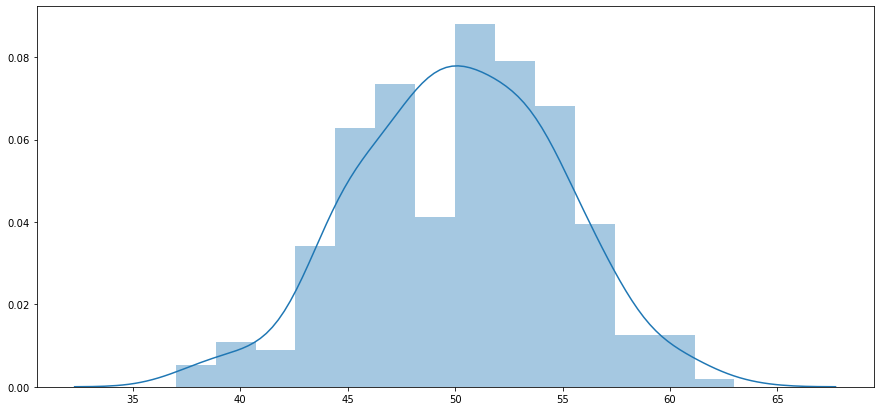

In [366]:
# Моделируем распределение случайной величины Бернулли (по Биномиальному закону)
# В данном случае - подбрасывание монетки (сколько выпадет орлов)
# n - количество испытаний для одной случайной величины (n раз подбросим монетку)
# size - количество случайных величин Бернулли (сколько испытаний будет проведено
#- сколько раз по n раз мы будем подбрасывать монетку)

# p - вероятность успеха (в нашем случае - 50%)
# Результат метода rvs будет количество успешных испытаний для каждой случайной величины
from scipy.stats import binom 
monetka = binom.rvs(size=300, p=0.5, n=100)
sns.distplot(monetka)

In [368]:
print(f"Вероятность ровно 45 раз успешно выполнить испытание = {binom.pmf(k=45, n=100, p=0.5)}")
print(f"Вероятность 45 раз и менее раз успешно выполнить испытание = {binom.cdf(k=45, n=100, p=0.5)}")

Вероятность ровно 45 раз успешно выполнить испытание = 0.048474296626427174
Вероятность 45 раз и менее раз успешно выполнить испытание = 0.18410080866334827


In [369]:
monetka[monetka <= 45].shape[0] / monetka.shape[0]

0.17333333333333334

In [370]:
monetka[monetka == 45].shape[0] / monetka.shape[0]

0.06333333333333334

### <center> Распределение Пуассона </center>
$$  P(X = x) = \frac{\mu^x * \exp^{-\mu}}{x!}, $$
where $\mu = n*p$

Данное распределение применяется для маловероятных событий (p мало) в больших выборках (n велико)

In [374]:
from math import exp, factorial
def poisson_prob(n, p, x):
    mu = n * p
    return(((mu**x) * exp(-mu)) / factorial(x))
n, p, x = 500, 0.05, 20
print(f"Вероятность для распределения Пуассона = {poisson_prob(n, p, x)}")
print(f"Вероятность для распределения Бернулли = {binomial_prob(n, p, x)}")

Вероятность для распределения Пуассона = 0.05191746860849132
Вероятность для распределения Бернулли = 0.05161619253663997


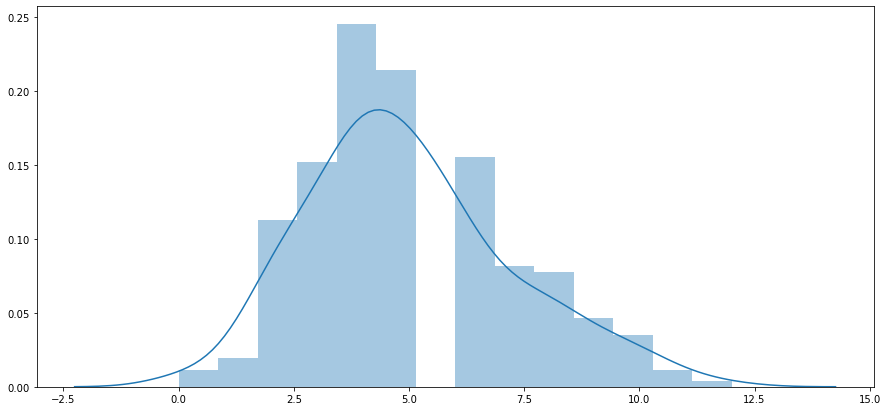

In [375]:
from scipy.stats import poisson
pois_distr = poisson.rvs(size=300, mu=100 * 0.05)
sns.distplot(pois_distr)

In [376]:
# Вытащим 5% квантиль распределения Пуассона готовым методом

print(f"5% квантиль = {poisson.ppf(mu=100 * 0.05, q=0.05)}")
# Левее данного числа расположены 5% всех значений для данного распределения
print(f"Согласно нашему смоделированному распределению Пуассона, 5% квантиль = \
{np.quantile(pois_distr, 0.05)}")

5% квантиль = 2.0
Согласно нашему смоделированному распределению Пуассона, 5% квантиль = 2.0


### <center> Геометрическое распределение
$$  P(X = x) = (1-p)^{x-1} * p, $$

Данное распределение повторяет схему независимых испытаний Бернулли до первого успешного испытания

In [382]:
def geometric_prob(p, x):
    g = (1-p)**(x-1) * p
    return g
p, x = 0.2, 10
print(geometric_prob(p, x))
# Вероятность того, что успех случится на 10 испытании или раньше
prob_geom = 0
for x in range(10):
    prob_geom += geometric_prob(p=p, x=x)
print(prob_geom)

0.026843545600000015
1.1157822720000004


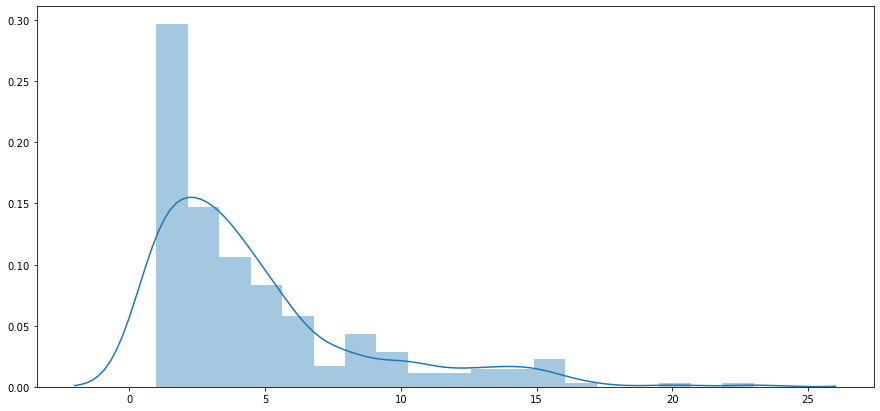

In [383]:
from scipy.stats import geom
geom_dist = geom.rvs(size=300, p=0.2)
sns.distplot(geom_dist)

## Непрерывные 

### <center> Экспоненциальное (показательное) \<center>

$$ f(x) = \lambda \exp^{-\lambda x}, x > 0$$

<center> Позволяет моделировать интервалы времени между наступлением событий. Представляет из себя распределение вероятности времени между событиями в случайном распределении Пуассона.
<center> Подробнее: 

https://medium.com/nuances-of-programming/экспоненциальное-распределение-восприятие-происхождение-применение-33d689e01de5

In [384]:
from scipy.stats import expon
def expon_prob(lambda_, x):
    g = lambda_ * math.exp(-lambda_ * x)
    return g
# Зададим параметры для lambda
# Пусть в районе живет 100 человек. Вероятность в течение 60 минут зайти в магазин = 5%.
n=100; p=0.05
lambda_ = n * p
print(f"Средний временной интервал между двумя людьми, зашедшими в магазин = {int(60/lambda_)} минут")
print(f"Вероятность того, что временной интервал между людьми составит 20 минут =\
                                                            {expon.cdf(x=20, scale = 60/lambda_)}")

Средний временной интервал между двумя людьми, зашедшими в магазин = 12 минут
Вероятность того, что временной интервал между людьми составит 20 минут =                                                            0.8111243971624382


### <center> Равномерное распределение 

$$ f(x) = \cases{p, x \in [a,b] \\ 0, x \notin [a,b]}  $$

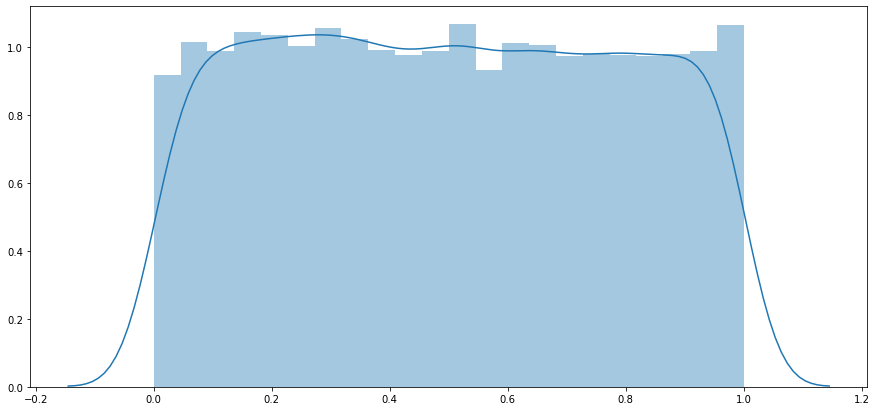

In [386]:
from scipy.stats import uniform
sns.distplot(uniform.rvs(size=10000))

### <center> Нормальное распределение

In [179]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3.nat-geo.ru/images/2019/4/10/08f4d4f5dec34925a7384c03b2de85b1.max-2000x1000.jpg")

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
<center> где $\mu$ - математическое ожидание, $\sigma^2$ - дисперсия

### <center> Стандартное нормальное распределение
$$ f(x) = \frac{1}{\sqrt{2\pi}} \exp^{-\frac{x^2}{2}} $$
<center> где $\mu=0$, $\sigma$ = 1

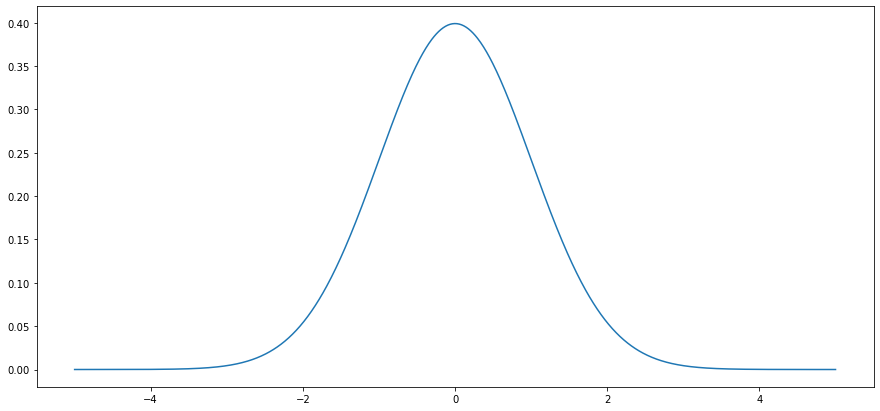

In [387]:
def normal_distr(x, mu=0, sigma=1):
    return 1/(sigma * np.sqrt(2*math.pi)) * np.exp(-((x - mu)**2 / (2 * sigma**2) ))
x = np.linspace(-5,5, 1000)
y = normal_distr(x)
plt.plot(x, y)

5% квантиль нормального распределения = -1.6448536269514729
95% квантиль нормального распределения = 1.6448536269514722
97.5% квантиль нормального распределения = 1.959963984540054
97.5% квантиль нормального распределения c размером size = 1000000 равен 1.9604615256328475
Вероятность того, что случайная величина примет значение 1.96 или меньше = 0.9750021048517795


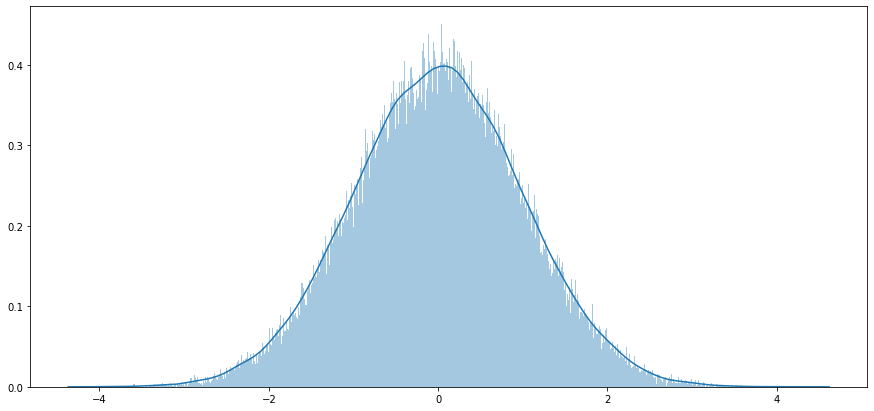

In [400]:
from scipy.stats import norm
sns.distplot(norm.rvs(size=10**5), bins=1000)
print(f"5% квантиль нормального распределения = {norm.ppf(0.05)}")
print(f"95% квантиль нормального распределения = {norm.ppf(0.95)}")
print(f"97.5% квантиль нормального распределения = {norm.ppf(0.975)}")
size_normal = 10**6
print(f"97.5% квантиль нормального распределения c размером size = {size_normal} равен \
{np.quantile(norm.rvs(size=size_normal), 0.975)}")
print(f"Вероятность того, что случайная величина примет значение 1.96 или меньше = {norm.cdf(1.96)}")

In [401]:
print(np.array([np.quantile(norm.rvs(size=100), 0.975) for i in range(10000)]).mean())
print(np.array([np.quantile(norm.rvs(size=1000), 0.975) for i in range(10000)]).mean())
print(np.array([np.quantile(norm.rvs(size=10000), 0.975) for i in range(10000)]).mean())

1.879609875783589
1.9508991188088671
1.9591739128627415


### <center> Хи-квадрат распределение
<center> $\chi_p^2 = \sum_p\xi_p^2$
<center> $$\xi \in N(0,1)$$ - случайная величина, имеющая стандартное нормальное распределение

/Users/iakubovskii/PythonR/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/iakubovskii/PythonR/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


97.5% квантиль распределения Хи-квадрат = 20.483177350807388
97.5% квантиль распределения полученного полуручным способом Хи-квадрат = 20.47602252442104
97.5% квантиль распределения вручную созданного Хи-квадрат = 20.47602252442104


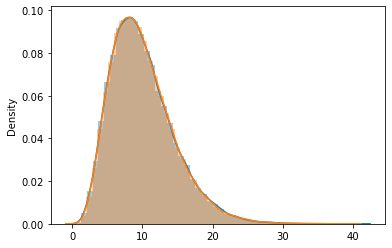

In [5]:
import numpy as np
from scipy.stats import norm, chi2
import seaborn as sns
def chi_distr(df=1):
    return np.sum(norm.rvs(size=df)**2)

# Генерируем Хи-квадрат распределение согласно определению
size_chi, df = 10**5, 10 # Всего 1 млн значений для 10 степеней свободы
Chi2_values = [chi_distr(df=df) for _ in range(size_chi)]


# Воспользуемся генерацией из готового пакета
from scipy.stats import chi2
Chi_values_rvs = chi2.rvs(df=df, size=size_chi)

# Сравним графики плотностей распределения
sns.distplot(Chi2_values)
sns.distplot(Chi_values_rvs)
print(f"97.5% квантиль распределения Хи-квадрат = {chi2.ppf(df=df, q=0.975)}")
print(f"97.5% квантиль распределения полученного полуручным способом Хи-квадрат = {np.quantile(Chi2_values, 0.975)}")
print(f"97.5% квантиль распределения вручную созданного Хи-квадрат = {np.quantile(Chi2_values, 0.975)}")

### <center> t-распределение Стьюдента
$$t_p = \frac{\xi_0}{\sqrt{\chi_p^2/p}}$$
<center> $\xi_0$ ~ N(0,1) - случайная величина, имеющая стандартное нормальное распределение, 
$\chi_p^2$ - случайная величина, имеющая распределение Хи-квадрат

97.5% квантиль распределения Стьюдента = 2.2281388519649385
97.5% квантиль распределения Стьюдента полученного полуручным способом =2.2276640952471842
97.5% квантиль распределения Стьюдента полученного ручным способом = 2.227370752937842


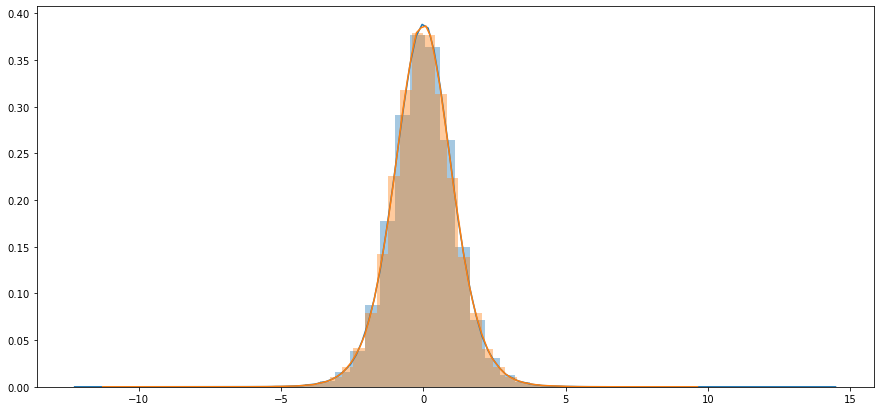

In [406]:
def t_distr(df=1):
    return (norm.rvs(size=1) / np.sqrt(chi_distr(df) / df))[0]

# Генерируем распределение Стьюдента согласно определению
size_t, df = 10**5, 10 # Всего 1 млн значений для 10 степеней свободы
t_values = [t_distr(df=df) for _ in range(size_t)]

# Воспользуемся генерацией из готового пакета
import scipy.stats as sts
t_values_rvs = sts.t.rvs(size=size_t, df=df)

# Сравним графики плотностей распределения
sns.distplot(t_values)
sns.distplot(t_values_rvs)

print(f"97.5% квантиль распределения Стьюдента = {sts.t.ppf(df=df, q=0.975)}")
print(f"97.5% квантиль распределения Стьюдента полученного полуручным способом =\
{np.quantile(t_values_rvs, 0.975)}")
print(f"97.5% квантиль распределения Стьюдента полученного ручным способом = {np.quantile(t_values, 0.975)}")

### <center> F-распределение Фишера
$$ F_{d_1, d_2} = \frac{\chi^2_{d_1}/d_1} {\chi^2_{d_2}/d_2} $$
<center> $\chi^2_{d_1}, \chi^2_{d_2}$ - случайные величины, имеющие Хи-квадрат распределение с d1 и d2 степенями свободы

97.5% квантиль распределения Фишера = 7.146381828732832
97.5% квантиль распределения Фишера полученного полуручным способом =6.974192120081441
97.5% квантиль распределения Фишера полученного ручным способом = 6.974192120081441


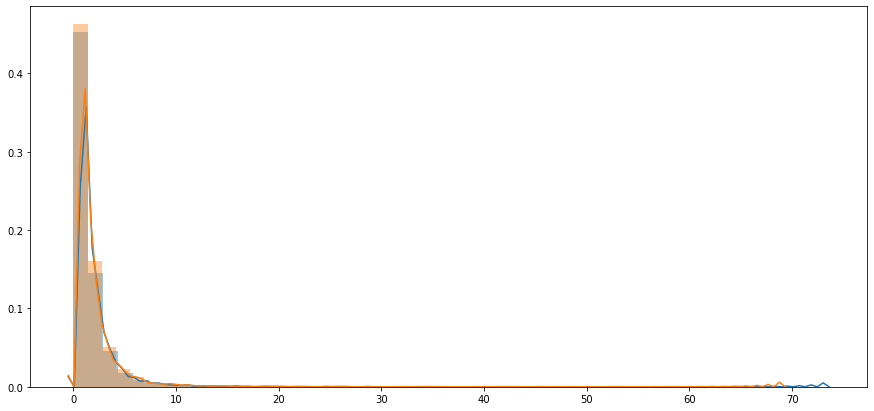

In [407]:
def F_distr(df1=1, df2=1):
    return (chi_distr(df1)/df1) / (chi_distr(df2)/df2)

# Генерируем распределение Фишера согласно определению
size_F, df1, df2 = 10**4, 5, 5 # Всего 1 млн значений для степеней свободы 5 и 5 
F_values = [F_distr(df1=df1, df2=df2) for _ in range(size_F)]

# Воспользуемся генерацией из готового пакета
import scipy.stats as sts
F_values_rvs = sts.f.rvs(size=size_F, dfn=df1, dfd=df2)

# Сравним графики плотностей распределения
sns.distplot(F_values)
sns.distplot(F_values_rvs)

print(f"97.5% квантиль распределения Фишера = {sts.f.ppf(dfn=df1, dfd=df2, q=0.975)}")
print(f"97.5% квантиль распределения Фишера полученного полуручным способом =\
{np.quantile(F_values_rvs, 0.975)}")
print(f"97.5% квантиль распределения Фишера полученного ручным способом = {np.quantile(F_values_rvs, 0.975)}")

# Часть 2. Центральная предельная теорема и закон больших чисел

Даже если исходная выборка не является нормально распределенной, если мы смоделируем несколько таких случайных выборок и возьмем средние, эти средние величины будут представлять собой **нормальное распределение**.
$$ \sqrt{n} \frac{\bar{X_n} - \mu}{\sigma} -> N(0,1)$$

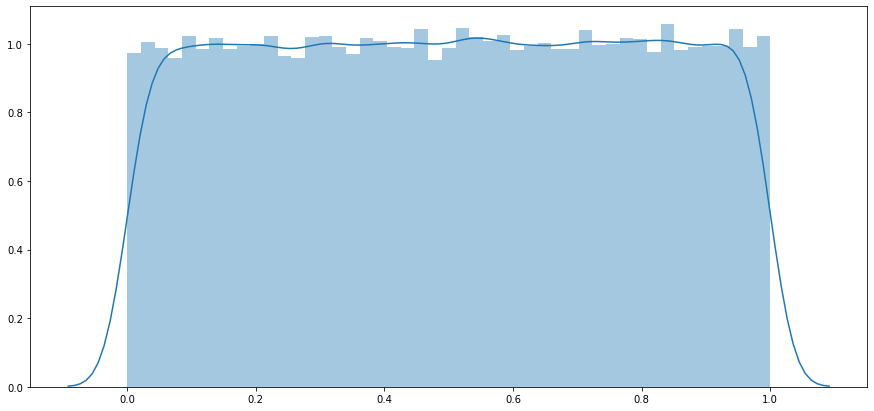

In [409]:
sns.distplot(uniform.rvs(size=100000))

In [340]:
uniform.rvs(size=1000).std() / np.sqrt(1000)

0.009249585697602498

Среднее = 0.5003163000360534, стандартное отклонение нового распределения = 0.009156381230184493


0.009266667800099944

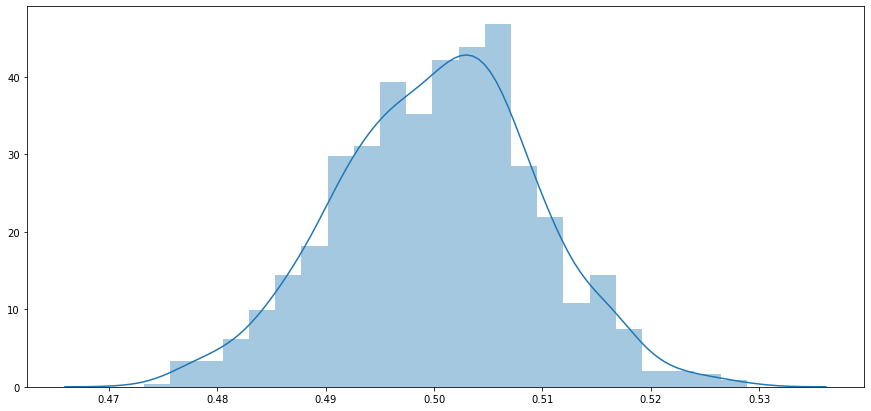

In [412]:
new_dist = np.array([np.mean(uniform.rvs(size=1000)) for _ in range(1000)])
sns.distplot(new_dist)
print(f"Среднее = {new_dist.mean()}, стандартное отклонение нового распределения = {new_dist.std()}")
uniform.rvs(size=1000).std() / np.sqrt(1000)


При достаточно большом количестве испытаний среднее значение случайной величины будет все ближе к своему теоретическому значению.
$$ P(|\bar{X_n} - \mu_n| <= \epsilon) -> 1 $$ $$n -> \infty$$



Пример: будем подбрасывать кубик и смотреть на среднее значение для разного количества испытаний.

In [6]:
# Пять подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5)]))
# 50 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50)]))
# 500 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(500)]))
# 5000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(5000)]))
# 50000 Подбрасываний
print(np.mean([np.random.randint(1,7) for _ in range(50000)]))

2.2
3.18
3.434
3.505
3.50136


# Часть 3. Проверка гипотез

Проверка гипотез используется в статистике для опровержения или неопровержения некоторых предположений,
выдвигаемых исследователями. Порой нам недостаточно одних лишь вычисленных статистических оценок (коэффициентов, средних значений, полученных распределений и т.д.). Поскольку на практике мы всегда имеем дело с выборкой, а не с самой генеральной совокупностью данных, полученные результаты на основании той или иной выборки могут быть неточны и невоспроизводимы на других выборках. 

Пример - социальные или медицинские исследования, которые при повторных испытания могут давать различные результаты. 

https://en.wikipedia.org/wiki/Replication_crisis

https://www.nature.com/news/1-500-scientists-lift-the-lid-on-reproducibility-1.19970

https://statisticsbyjim.com/hypothesis-testing/reproducibility-p-values/


John P. A. Ioannidis - "Why Most Published Research Findings Are False", 2005

В социально-экономических и естественных науках, как правило, мы не делаем однозначных и точных выводов относительно того или иного предположения (в отличие от математики и почти физики :)). Вместо этого мы руководствуемся принципом достаточного свидетельствования в пользу наших предположений.

### <center> Общая схема проверки гипотез в статистике 
<center> 1. Выдвигается нулевая гипотеза $H_0$ и альтернативная гипотеза $H_1$ (может быть двусторонняя или односторонняя)
<center> 2. Выбирается уровень значимости - вероятность отвергнуть нулевую гипотезу, когда она верна
<center> 3. Собираются данные и вычисляется статистика критерия (теста)
    <center> 4. С учетом уровня значимости, распределения статистики и вида альтернативной гипотезы определяется критическая область отвержения нулевой гипотезы
<center> 5. Если статистика критерия попадает в критическую область, то нулевая гипотеза отвергается в пользу альтернативной на уровне значимости, определенном в пункте 2

#### <center> Ошибки первого и второго рода
На рисунке ниже представлена иллюстрация ошибок первого и второго рода для $H_0$ (человек не беременный) против альтернативной $H_1$ (человек беременный)

In [188]:
Image(url = "https://i.redd.it/ob8za0yst6f21.png")

Уровень значимости $\alpha$ - вероятность совершить ошибку первого рода.
Помимо уровня значимости, исследователей еще интересует **мощность теста**, которая вычисляется как $1-\beta$, где $\beta$ - вероятность совершить ошибку второго рода. Ниже представлен пример проверки нулевой гипотезы $\mu=100$ против альтернативной $\mu=110$

In [190]:
Image(url = "https://phhp-faculty-cantrell.sites.medinfo.ufl.edu/files/2013/03/mod12-significance_ex5a.png")

### <center> На практике проверка гипотез сводится к вычислению ***p-value*** и его сравнением с уровнем значимости. 
#### <center> ***p-value*** - вероятность того, что при верности нулевой гипотезы статистика теста примет  вычисленное наблюдаемое значение либо ещё более экстремальное, то есть далекое от центра распределения. Большое ***pvalue*** означает, что вероятность того, что статистика теста примет текущее значение либо более аномальное высока и данные не противоречат распределению из нулевой гипотезы.

Если p-value > $\alpha$, то $H_0$ не отвергается

Если p-value < $\alpha$, то $H_0$ отвергается

## 1. Критерии согласия эмпирических данных нормальному распределению
    
Обширный список критериев согласия для проверки на нормальность представлен тут:
https://docviewer.yandex.ru/view/0/?page=16&*=ChdkZogunLp6fYDwqDsdvXyyJEV7InVybCI6InlhLWRpc2stcHVibGljOi8vNHJ3clVnVmRPYnNDaDNBYlFhSEZWNGFyVW9SeHpMS3pxSHlzemhNUnlOcz0iLCJ0aXRsZSI6ItC60YDQuNGC0LXRgNC40Lgg0L3QvtGA0LzQsNC70YzQvdC%2B0YHRgtC4INCy0YHQtS5wZGYiLCJub2lmcmFtZSI6ZmFsc2UsInVpZCI6IjAiLCJ0cyI6MTYwMjU3ODExMzMyOSwieXUiOiI1MjQ5ODg3NDYxNjAyNTAxNDY1In0%3D

    

Мы, в свою очередь, рассмотрим основные тесты на нормальность, использующиеся в повседневной статистике. 

### Тест Харке-Бера и Шапиро-Уилка
Эти тесты проверяют, является ли распределение случайной величины нормальным или нет.

Предположения: наблюдения в  выборке независимы и одинаково распределены (iid).

$H_0$: распределение нормальное

$H_a$: распределение не нормальное 

In [416]:
# Тест Шапиро-Уилка
from scipy.stats import shapiro
# Уровень значимости - 5%
alpha = 0.05
data = norm.rvs(loc = 1, scale = 1, size = 10)

stat_shapiro, p_shapiro = shapiro(data)
print('stat_shapiro=%.3f, p_shapiro=%.3f' % (stat_shapiro, p_shapiro))
if p_shapiro > alpha:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")

# Тест Харке-Бера
from scipy.stats import jarque_bera
# Уровень значимости - 5%
alpha = 0.05
data = norm.rvs(loc = 1, scale = 1, size = 10)

stat_jb, p_jb = jarque_bera(data)
print('stat_jb=%.3f, p_jb=%.3f' % (stat_jb, p_jb))
if p_jb > alpha:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу не отвержения нулевой гипотезы - распределение нормальное')
else:
    print('Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод \
в пользу отвержения нулевой гипотезы \ - распределение НЕ нормальное')
print("\n")


stat_shapiro=0.899, p_shapiro=0.214
Согласно тесту Шапиро-Уилка на 5% уровне значимости делаем вывод в пользу не отвержения нулевой гипотезы - распределение нормальное


stat_jb=0.417, p_jb=0.812
Согласно тесту Харке-Бера на 5% уровне значимости делаем вывод в пользу не отвержения нулевой гипотезы - распределение нормальное




## 2. Параметрические тесты
#### <center>Параметрические тесты используются в ситуации, когда распределение одной или нескольких случайных величин известно. Как правило, в данных тестах требуется выполнение условия нормальности. Бывают как для одной, так и для нескольких переменных.
    

### Тест Стьюдента о равенстве среднего значения определенному значению из генеральной совокупности

$H_0$: $\bar{x} = \mu$

$H_1$: $\bar{x} \neq \mu$

$$t_{stat} = \frac{\bar{x} - \mu} {\sigma / \sqrt{n}}$$

### Тест Стьюдента о равенстве средних двух независимых выборок


Проверяет, существенно ли различаются средние значения для двух независимых выборок.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: средние равны

H1: средние не равны

$$ t = \frac{\bar{x_1} - \bar{x_2}} {\sqrt{s^2_p * (1/n_1 + 1/n_2)}} $$ 
$$ s^2_p = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2} {n_1 + n_2 - 2}  $$

In [1]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Средние равны')
else:
    print('Средние не равны')

stat=-0.326, p=0.748
Средние равны


In [11]:
import numpy as np
m1, m2 = np.mean(data1), np.mean(data2)
s1, s2 = np.var(data1, ddof = 1), np.var(data2, ddof = 1)
n1, n2 = len(data1), len(data2)
s2p = ((n1 - 1)*s1 + (n2 - 1)*s2)/(n1 + n2 - 2)
t_stat = (m1 - m2) / (np.sqrt(s2p * (1/n1 + 1/n2)))
t_stat

-0.3256156287495794

### Тест на равенство дисперсий двух независимых выборок

Проверяет, существенно ли различаются дисперсии значения для двух независимых выборок.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: дисперсии равны

H1: дисперсии не равны

$$ F_{stat} = \frac{s_1}{s_2} $$ 
<center>  vs <center>
$$ F_{crit}(\alpha, n_1-1, n_2-1) $$

In [30]:
F_stat = s1 / s2 
from scipy.stats import f as f_
F_crit = f_.pdf(0.975, len(data1)-1, len(data2)-1)
F_stat > F_crit

True

### Тест Стьюдента равенства средних из двух парных выборок

Пример: берем студентов (например, вас) и смотрим как вы сдаете разные экзамены на сессии.

Проверяет, существенно ли различаются средние в двух парных выборках.

Предпосылки:

- Наблюдения в каждой выборке независимы и идентично распределены (iid).
- Наблюдения в каждой выборке нормально распределены.
- Наблюдения в каждой выборке являются парными.

H0: средние значения равны.

H1: средние значения не равны.

In [13]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
# Проверка равенства дисперсий

print(np.var(data1) - np.var(data2))

stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Средние равны')
else:
    print('Средние не равны')

1.2857049999999999
stat=-0.334, p=0.746
Средние равны


### Тест на значимость коэффициента корреляции Пирсона

Проверяет, значима ли корреляция Пирсона.

Предпосылки:

- Наблюдения в каждой выборке независимы и одинаково распределены (iid).
- Наблюдения в каждой выборке нормально распределены.

H0: коэффициент корреляции Пирсона не значимо отличен от нуля

H1: коэффициент корреляции Пирсона значимо отличен от нуля

In [421]:
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p,  = pearsonr(data1, data2)
corr = np.corrcoef([data1, data2])[0,1]
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Корреляция не значима отлична от нуля на 5% уровне')
else:
    print(f'Корреляция значима на 5% уровне значимости и равна {corr}')

stat=0.688, p=0.028
Корреляция значима на 5% уровне значимости и равна 0.6879696368388862


### Применение Хи-квадрат теста для анализа таблиц сопряженности

Таблица сопряжённости (таблица контингентности, факторная таблица) в статистике — средство представления совместного распределения двух переменных, предназначенное для исследования связи между ними. Таблица сопряжённости является наиболее универсальным средством изучения статистических связей, так как в ней могут быть представлены переменные с любым уровнем измерения. Таблицы сопряжённости часто используются для проверки гипотезы о наличии связи между двумя признаками с использованием точного теста Фишера или критерия согласия Пирсона. Часто применяют в медицине для тестирования работы препаратов.



Предпосылки:
- Наблюдения, использованные при расчете таблицы сопряженности, являются независимыми.
- В каждой ячейке таблицы содержится 25 и более наблюдений.

$H_0$: прививка не влияет на заболеваемость

$H_1$: прививка влияет на заболеваемость

#### Пример Хи-квадрат теста для таблиц сопряженности

Допустим, мы хотим узнать, помогает ли людям прививка от холеры. По столбцам таблицы обозначен факт болезни, по строкам - факт прививки.

| Прививался или нет \  Болел - Не болел| Не болел | Болел | Всего |
| --- | --- | --- | --- |
| Не прививался | 1022 | 11 | 1033|
| Прививался| 1625 | 5 | 1630 |
| Всего| 2647 | 16 | 2663 |


In [253]:
from scipy.stats import chi2_contingency

table = [[1022, 11],[1625,  5]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Не значимо отлична от нуля на 5% уровне')
else:
    print('Значимо отлична от нуля на 5% уровне')

stat=4.882, p=0.027
Значимо отлична от нуля на 5% уровне


### Тест на значимость коэффициента регрессии (один коэффициент)
Предпосылки:
- Выполнены условия Гаусса-Маркова
- Ошибки регрессии распределены по нормальному закону

$H_0: \theta=0$

$H_1: \theta \neq 0$

Статистика теста:

$ t_{stat} = \frac{\hat{\theta} - \theta_{H_0}}{s.e.(\theta)} $, $ t \in  t_{n-p} $

$s.e.(\theta) = \sqrt{\frac{RSS}{(n-p)}} * (X^TX)^{-1}$, $RSS = \sum_i(y_i - \hat{y})^2$

Если $|t_{stat}| > t_{crit}(\alpha)$ ->  нулевая гипотеза отвергается в пользу альтернативной 

In [3]:
from sklearn.datasets import load_boston 
y, X = load_boston()['target'], load_boston()['data']
# Добавим вектор единиц (модели с константой)
X = np.hstack([np.ones([X.shape[0], 1]), X])
y_name = 'price'
X_names = list(load_boston()['feature_names'])
X_names.insert(0,"const")

# Парная регрессия с первой переменной
X_reg = X[:, :2]
# Оценки коэффициентов
coefs_1 = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(f"Коэффициенты регрессии равны {coefs_1}")
# Значения, лежащие на подобранной прямой 
y_fitted = X_reg @ coefs_1
RSS = np.sum((y - y_fitted)**2)
# Стандартные ошибки
print(f"Стандартные ошибки равны {np.sqrt(RSS / (X_reg.shape[0] - X_reg.shape[1]) * np.linalg.inv(X_reg.T @ X_reg))}")

Коэффициенты регрессии равны [24.03310617 -0.41519028]
Стандартные ошибки равны [[0.40914196        nan]
 [       nan 0.04389038]]


<ipython-input-3-3455832eaa87>:18: RuntimeWarning: invalid value encountered in sqrt
  print(f"Стандартные ошибки равны {np.sqrt(RSS / (X_reg.shape[0] - X_reg.shape[1]) * np.linalg.inv(X_reg.T @ X_reg))}")


In [24]:
import statsmodels.api as sm
model = sm.OLS(endog = y, exog = X[:, :10])
results_simple = model.fit()
results_simple.summary(xname = X_names[:10])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     94.63
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          9.55e-102
Time:                        15:17:33   Log-Likelihood:                -1587.4
No. Observations:                 506   AIC:                             3195.
Df Residuals:                     496   BIC:                             3237.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1554      4.027      0.039      0.969      -7.756       8.067
CRIM          -0.1780      0.038     -4.670      0.000      -0.253      -0.103
ZN             0.0610      0.015      4.032      0.000       0.031       0.091
INDUS         -0.2100      0.064     -3.275      0.001      -0.336      -0.084
CHAS           4.5366      1.005      4.513      0.000       2.562       6.512
NOX          -13.3427      4.243     -3.144      0.002     -21.680      -5.005
RM             6.7912      0.407     16.696      0.000       5.992       7.590
AGE           -0.0563      0.015     -3.841      0.000      -0.085      -0.027
DIS           -1.7483      0.235     -7.433      0.000      -2.210      -1.286
RAD           -0.0453      0.044     -1.038      0.300      -0.131       0.040
==============================================================================
Omnibus:                      234.277   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1850.140
Skew:                           1.844   Prob(JB):                         0.00
Kurtosis:                      11.611   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Тест на совместную значимость коэффициентов регрессии (больше одного коэффициента)

Предпосылки:
- Выполнены условия Гаусса-Маркова
- Ошибки регрессии распределены по нормальному закону

$H_0: \theta_1=\theta_2=\theta_3=...=\theta_p=0$

$H_1$ :хотя бы один коэффициент не равен нулю

Статистика теста:

$ F_{stat} = \frac{(RSS_{H_0} - RSS) / (p-1)} {RSS / (n-p)} $

Если $|F_{stat}| > F_{crit}(\alpha)$ со степенями свободы p-1 и n-p ->  нулевая гипотеза отвергается в пользу альтернативной 

In [309]:
# Множественная регрессия с тремя переменными
X_reg = X[:, :4]
# Оценки коэффициентов
coefs_2 = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y 
print(f"Коэффициенты регрессии равны {coefs_2}")

Коэффициенты регрессии равны [27.39464678 -0.24862831  0.05850082 -0.41557782]


In [358]:
# Проверим на совместную значимость две последние переменные 

# 3. Непараметрические тесты
#### <center>Параметрические тесты, как правило, являются более мощными и могут проверить более широкий спектр альтернативных гипотез. Непараметрические тесты, в свою очередь, используются в ситуации, когда распределение одной или нескольких случайных величин не удовлетворяет необходимым предпосылкам. В таком случае применение параметрических тестов будет неверно методологически, что может привести к нашей известной проблеме "невоспроизводимости результатов" в будущем. 

### Тест Манна-Уитни о равенстве распределений двух независимых выборок

stat=40.000, p=0.236
Распределения различны


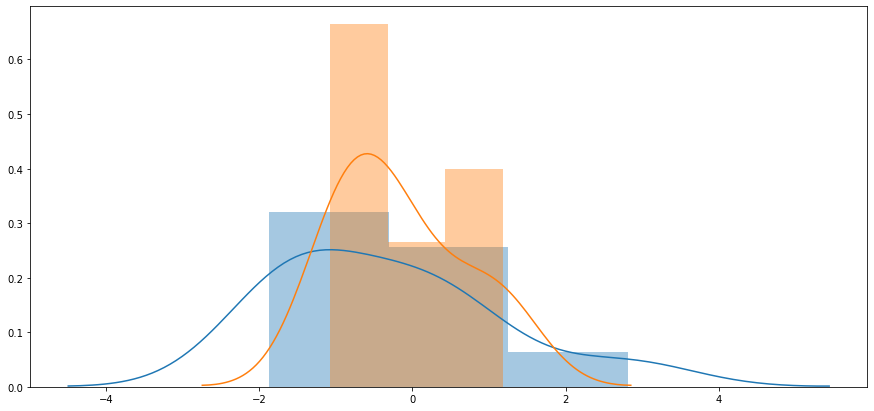

In [427]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_mu, p_mu = mannwhitneyu(data1, data2)
sns.distplot(data1)
sns.distplot(data2)
print('stat=%.3f, p=%.3f' % (stat_mu, p_mu))
if p_mu > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

### Тест Уилкоксона о равенстве распределений двух ПАРНЫХ выборок

In [260]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_wil, p_wil = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat_wil, p_wil))
if p_wil > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

stat=21.000, p=0.557
Распределения одинаковы


### Тест Крускалла-Уолиса о равенстве распределений двух и более независимых выборок

In [428]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat_kru, p_kru = kruskal(data1, data2, data2 * 3, data1 * 4)
print('stat=%.3f, p=%.3f' % (stat_kru, p_kru))
if p_kru > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')

stat=2.644, p=0.450
Распределения одинаковы


### Тест Фридмана о равенстве распределений двух и более ПАРНЫХ выборок

In [258]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat_fri, p_fri = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat_fri, p_fri))
if p > 0.05:
    print('Распределения одинаковы')
else:
    print('Распределения различны')


stat=0.800, p=0.670
Распределения одинаковы


### Тест  о значимости ранговой корреляции Спирмэна 

In [1]:
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Ранговая корреляция Спирмэна не значимо отлична от нуля')
else:
    print('Ранговая корреляция Спирмэна значимо отлична от нуля')

stat=0.127, p=0.726
Ранговая корреляция Спирмэна не значимо отлична от нуля


# Часть 4. Метод Монте-Карло и бутстрап
 #### <center> Наличие огромного количества статистических процедур при проверке гипотез с уже зараннее известными распределениями статистик - это, конечно, хорошо. Однако, бывают ситуации, когда при тестировании гипотез распределение статистики зараннее неизвестно. В этом случае приходит на помощь самостоятельное вычисление критических значений статистики при помощи моделирования большого количества выборок с приблизительно тем же набором наблюдений, что и исходная.

### <center> 1. Метод Монте-Карло

Данный метод использует моделирование большого количества выборок из заданного распределения. Рассмотрим задачу прогнозирования прибыли с продаж для примера из лекции 3.

1368.1493186454509

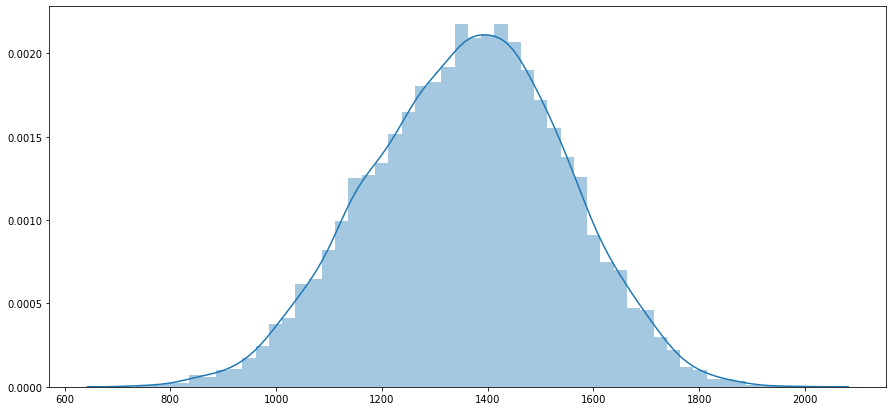

In [433]:
# Количество итераций
iterations_monte_carlo = 10000
# Вероятные значения цены  - треугольное распределение
price = np.random.triangular(5.9, 6, 6.1, size = iterations_monte_carlo)
# Вероятные значения объема продаж продукции - нормальное распределение
volume = np.random.normal(loc = 802, scale = 25, size = iterations_monte_carlo)
# Вероятные значения себестоимости - треугольное распределение
costs = np.random.triangular(0.5, 0.55, 0.65, size = iterations_monte_carlo)
operat_expenses = np.random.normal(loc = 0.15, scale = 0.02, size = iterations_monte_carlo)

# Вероятные значения для прибыли с продаж
profits = price * volume * (1 - costs - operat_expenses)
# Распределение прибыли с продаж
sns.distplot(profits)
np.quantile(profits, 0.5)

### <center> 2. Бутстрап

Метод бутстрапа заключается в следующем. Пусть имеется выборка $\large X$ размера $\large N$. Равномерно возьмем из выборки $\large N$ объектов с возвращением. Это означает, что мы будем $\large N$ раз выбирать произвольный объект выборки (считаем, что каждый объект «достается» с одинаковой вероятностью $\large \frac{1}{N}$), причем каждый раз мы выбираем из всех исходных $\large N$ объектов. Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы. Обозначим новую выборку через $\large X_1$. Повторяя процедуру $\large M$ раз, сгенерируем $\large M$ подвыборок $\large X_1, \dots, X_M$. Теперь мы имеем достаточно большое число выборок и можем оценивать различные статистики исходного распределения.


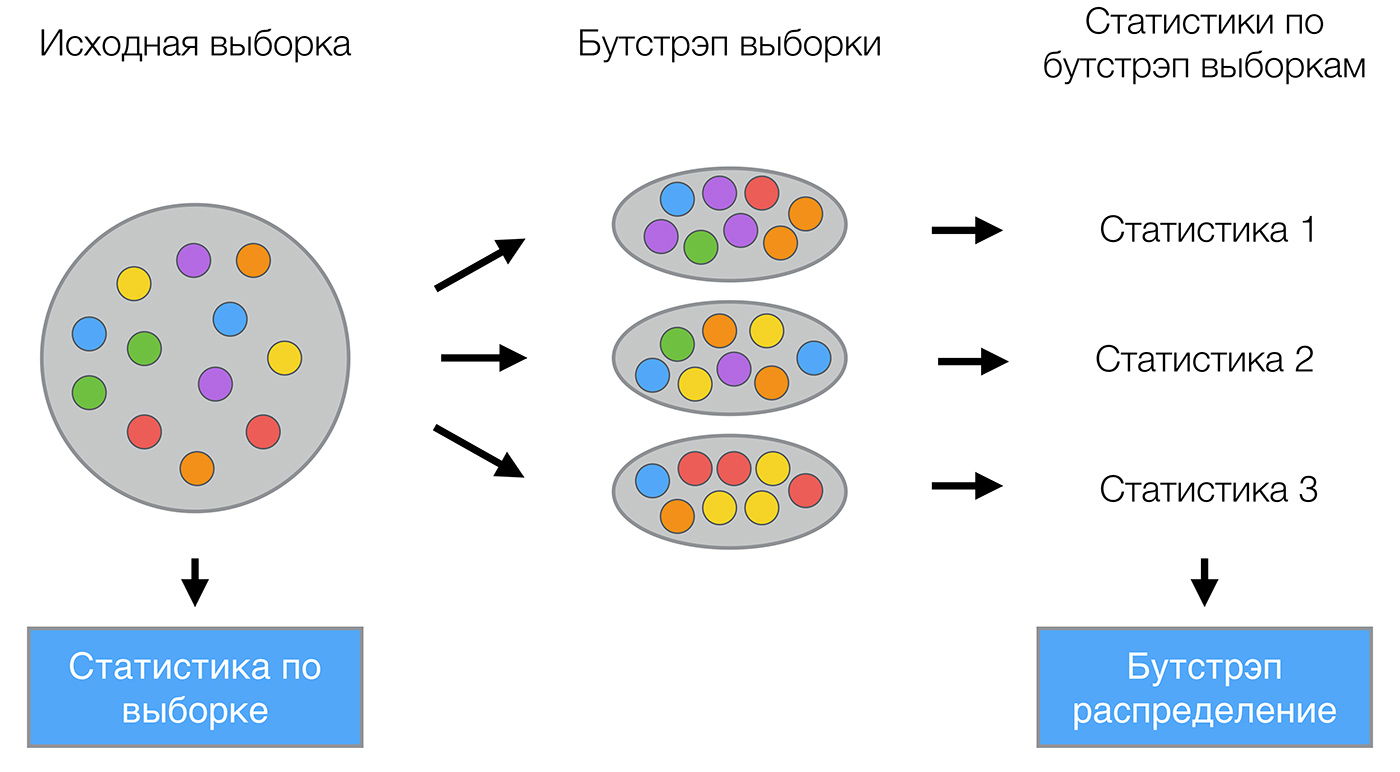

In [361]:
path_to_images = "/Users/iakubovskii/Machine_Learning/RANEPA/Data/"
Image(path_to_images + "bootstrap.jpg", width = 800)

Давайте построим доверительный интервал для среднего значения цены на квартиры в Бостоне.


In [438]:
from sklearn.datasets import load_boston
price_boston = load_boston()['target']
price_boston[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [439]:
import numpy as np
def get_bootstrap_samples(data, n_samples):
    # функция для генерации подвыборок с помощью бутстрэпа
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    # функция для интервальной оценки
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

# ставим seed для воспроизводимости результатов
np.random.seed(0)

# генерируем выборки с помощью бутстрэра и сразу считаем по каждой из них среднее
boston_price_mean_scores = [np.mean(sample) 
                       for sample in get_bootstrap_samples(price_boston, 1000)]

#  выводим интервальную оценку среднего
print("Цена на квартиры в Бостоне:  90% доверительный интервал для среднего \n",  stat_intervals(boston_price_mean_scores, 0.05))

Цена на квартиры в Бостоне:  90% доверительный интервал для среднего 
 [21.71696146 23.33829051]
